# 데이터 분석 : Pandas 기초

## Pandas
- 데이터를 조작 및 분석 등 다루기 위한 파이썬의 라이브러리
    1. (표 형태의) 데이터르ㅡㄹ 읽고
    2. 정리(정제, 전처리)하고
    3. 변환(가공)하고
    4. 요약/집계(분석)
    - 관련 기능을 쉽고 빠르게 수행

## DataFrame과 Series

데이터
- 대부분의 데이터는 엑셀과 유사한 표 형태로 저장하며 다룸

대표적인 Pandas의 자료 구조.
- 행(Row)과 열(column)으로 이루어진 2차원의 행렬 데이터를 표 형태로 저장
- 각 행과 열은 이름이 있어 데이터 검색과 필터링에 용이함.
- 일반적인 엑셀 표 데이터에 인덱스 열이 추가된 형태

### 데이터 프레임 생성하는 법 (1): 딕셔너리로 생성
- pd 모듈의 DataFrame 클래스 생성자 호출
    - 인자로 딕셔너리로 전달
    - key가 컬럼이 되며, value는 각 행의 데이터를 담은 리스트

In [ ]:
import pandas as pd

data = {
    '이름' : ['철수','영희','민수'],
    '나이' : [25,30,22],
    '도시' : ['서울','부산','대구']
}

df = pd.DataFrame(data)
print(df)

   이름  나이  도시
0  철수  25  서울
1  영희  30  부산
2  민수  22  대구


### 데이터 프레임 생성하는 법 (2): 중첩 리스트(2차원 리스트)로 생성
- pd 모듈의 datafram 클래스 생성자 호출
    - 인자로 2차원 리스트 전달
    - 그리고 columns 매개 변수에 컬럼 이름 목록 전달
    - 바깥족 리시트의 원소가 하나의 컬럼을 구성함

In [ ]:
import pandas as pd

data = [
    ['철수',25,'서울'],
    ['영희',30,'부산'],
    ['민수',22,'대구']
]

df = pd.DataFrame(data, columns=['이름', '나이', '도시'])
print(df)

   이름  나이  도시
0  철수  25  서울
1  영희  30  부산
2  민수  22  대구


### 데이터 프레임 생성하는 방법 (3) : 외부 데이터로 생성
- pd 모듈의 파일 읽기 함수 호출
    - 외부 파일로부터 데이터를 읽어와 데이터프레임을 생성
    - 데이터를 직접 생성하기보다는 이미 존재하는 데이터를 다루기에 가장 많이 사용하는 방법
        - .csv 파일 읽어오기 : read_csv()
        - .xlsx 파일로 저장되어 있는 데이터: read_excel()

In [ ]:
import pandas as pd

df = pd.read_csv('C:/Users/USER/Desktop/새싹/SSESAC_DE/1114/data/seoul_park.csv')

print(df)

              날짜 공휴일     날씨   유료합계     어른  청소년  어린이  외국인   단체   무료합계     총계
0     2016-01-01   O  구름 조금  3,359  2,799  141  419   47    0  1,023  4,382
1     2016-01-02   O  구름 많음  5,173  4,370  203  600  100  111  2,092  7,265
2     2016-01-03   O  구름 많음  3,008  2,571  128  309   91    0  1,549  4,557
3     2016-01-04   X  구름 많음    890    602  NaN  235   51  223    800  1,690
4     2016-01-05   X  구름 많음    416    319   35   62   43   47    840  1,256
...          ...  ..    ...    ...    ...  ...  ...  ...  ...    ...    ...
1081  2019-03-27   X  구름 많음    504    464   10   30   21    -    613  1,117
1082  2019-03-28   X  구름 많음    761    687   46   28   35  108    904  1,665
1083  2019-03-29   X  구름 조금  1,644  1,447  120   77   14  188  1,226  2,870
1084  2019-03-30   O     흐림  1,539  1,326   44  169   29  115    913  2,452
1085  2019-03-31   O  구름 조금  3,061  2,563  111  387   53    -  1,357  4,418

[1086 rows x 11 columns]


## 데이터 살펴보기

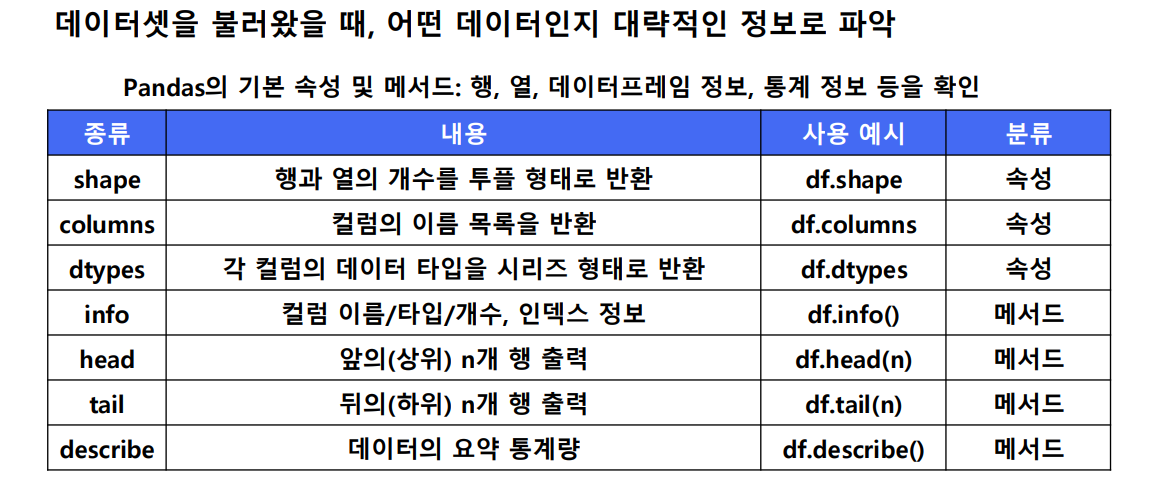

### 데이터 일부분 확인하기 : head(), tail()

In [ ]:
# 상위 행 일부를 데이터 프레임으로 반환
# Default 값은 5개의 행을 출력
# 인자에 숫자를 넣으면 그 개수만큼 행 출력
df.head()

,날짜,공휴일,날씨,유료합계,어른,청소년,어린이,외국인,단체,무료합계,총계
0,2016-01-01,O,구름 조금,"3,359","2,799",141,419,47,0,"1,023","4,382"
1,2016-01-02,O,구름 많음,"5,173","4,370",203,600,100,111,"2,092","7,265"
2,2016-01-03,O,구름 많음,"3,008","2,571",128,309,91,0,"1,549","4,557"
3,2016-01-04,X,구름 많음,890,602,NaN,235,51,223,800,"1,690"
4,2016-01-05,X,구름 많음,416,319,35,62,43,47,840,"1,256"


In [ ]:
# 하위 행 일부를 데이터프레임으로 반환
# Default 값은 5개의 행을 출력
# 인자에 숫자를 넣으면 그 개수만큼 행 출력
df.tail()

,날짜,공휴일,날씨,유료합계,어른,청소년,어린이,외국인,단체,무료합계,총계
1081,2019-03-27,X,구름 많음,504,464,10,30,21,-,613,"1,117"
1082,2019-03-28,X,구름 많음,761,687,46,28,35,108,904,"1,665"
1083,2019-03-29,X,구름 조금,"1,644","1,447",120,77,14,188,"1,226","2,870"
1084,2019-03-30,O,흐림,"1,539","1,326",44,169,29,115,913,"2,452"
1085,2019-03-31,O,구름 조금,"3,061","2,563",111,387,53,-,"1,357","4,418"


### 데이터 정보 확인하기 : info()

- 데이터의 정보를 확인할 때 사용
    - 인덱스 개수 및 범위
    - 컬럼의 개수, 컬럼의 이름
    - 각 컬럼의 데이터 개수, 데이터 타입

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1086 non-null   object
 1   공휴일     1086 non-null   object
 2   날씨      946 non-null    object
 3   유료합계    1086 non-null   object
 4   어른      1086 non-null   object
 5   청소년     1081 non-null   object
 6   어린이     1086 non-null   object
 7   외국인     1086 non-null   object
 8   단체      1086 non-null   object
 9   무료합계    1086 non-null   object
 10  총계      1086 non-null   object
dtypes: object(11)
memory usage: 93.5+ KB


### 데이터 확인 속성: shape, dtypes, columns

In [ ]:
# shape : 행과 열의 개수를 투플 형태로
print(df.shape)

(1086, 11)


In [ ]:
# columns : 컬럼의 이름 목록
print(df.columns)

Index(['날짜', '공휴일', '날씨', '유료합계', '어른', '청소년', '어린이', '외국인', '단체', '무료합계',
       '총계'],
      dtype='object')


In [ ]:
# dtypes : 각 컬럼의 데이터 타입 정도
print(df.dtypes)

날짜      object
공휴일     object
날씨      object
유료합계    object
어른      object
청소년     object
어린이     object
외국인     object
단체      object
무료합계    object
총계      object
dtype: object


### 데이터프레임 특정 컬럼 추출하기
- 데이터프레임에서 컬럼 이름으로 해당 컬럼을 시리지 형태로 추출 가능
    - ```df['컬럼이름']```

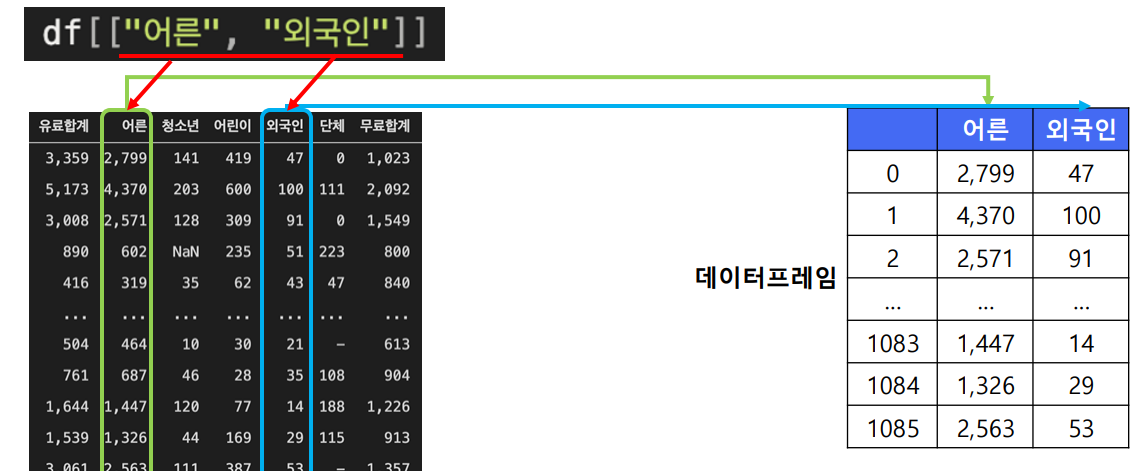

### 데이터의 빈도 세기: value_counts()
- 범주형 데이터(이산형 데이터)에 대해 각 고유 값이 몇 개씩 저장되어 있는지 파악
    - df['특정 컬럼].value_counts()

In [ ]:
df['날씨'].value_counts()

날씨
구름 많음    277
구름 조금    236
맑음       222
비        101
흐림       100
눈          6
눈/비        4
Name: count, dtype: int64

## 데이터 변환하기(Type, Value)

- 데이터는 항상 원하는 타입으로 되어있지 않다.
    - 실습에 사용할 데이터에 숫자 데이터가 있지만, 실제로는 정수가 아닌 **Object타입(텍스트, 문자열)**이다.
    - 텍스트 타입인 경우에 수치형 연산이 불가능하기에 타입 변환이 필수
    - 여러 타입의 값이 혼재된 경우 object로 간주

### 데이터 타입 변환하기 : astype()
- 특정 컬럼의 데이터 타입을 원하는 특정 타입으로 변환
    - ```df['특정 컬럼'].astype(변환할 타입)```

- Pandas의 메서드는 원본에 바로 적용하지 않는다!
    - 원본 데이터프레임에 반영을 하려면 **덮어쓰기 작업**이 필요하다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1086 non-null   object
 1   공휴일     1086 non-null   object
 2   날씨      946 non-null    object
 3   유료합계    1086 non-null   object
 4   어른      1086 non-null   object
 5   청소년     1081 non-null   object
 6   어린이     1086 non-null   object
 7   외국인     1086 non-null   object
 8   단체      1086 non-null   object
 9   무료합계    1086 non-null   object
 10  총계      1086 non-null   object
dtypes: object(11)
memory usage: 93.5+ KB


In [ ]:
df['어른'] = df['어른'].str.replace(',', '', regex=False).astype(int)
df['어린이'] = df['어린이'].str.replace(',', '', regex=False).astype(int)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1086 non-null   object
 1   공휴일     1086 non-null   object
 2   날씨      946 non-null    object
 3   유료합계    1086 non-null   object
 4   어른      1086 non-null   int64 
 5   청소년     1081 non-null   object
 6   어린이     1086 non-null   int64 
 7   외국인     1086 non-null   object
 8   단체      1086 non-null   object
 9   무료합계    1086 non-null   object
 10  총계      1086 non-null   object
dtypes: int64(2), object(9)
memory usage: 93.5+ KB


### 숫자형 타입으로 변환하기:to_numeric()
- 컬럼의 데이터 타입을 숫자(정수, 실수 등등) 타입으로 변환
    - ```pd.to_numeric(df['특정컬럼'])```

In [ ]:
df['유료합계'] = pd.to_numeric(df['유료합계'].str.replace(',','', regex=False))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1086 non-null   object
 1   공휴일     1086 non-null   object
 2   날씨      946 non-null    object
 3   유료합계    1086 non-null   int64 
 4   어른      1086 non-null   int64 
 5   청소년     1081 non-null   object
 6   어린이     1086 non-null   int64 
 7   외국인     1086 non-null   object
 8   단체      1086 non-null   object
 9   무료합계    1086 non-null   object
 10  총계      1086 non-null   object
dtypes: int64(3), object(8)
memory usage: 93.5+ KB


### 날짜형 타입으로 변환하기 : to_datetime()
- 날짜 형식을 갖는 문자열, 정수, 실수를 날짜/시간 타입으로 변환
    - ```pd.to_datetime(df['특정컬럼'])```

In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      1086 non-null   datetime64[ns]
 1   공휴일     1086 non-null   object        
 2   날씨      946 non-null    object        
 3   유료합계    1086 non-null   int64         
 4   어른      1086 non-null   int64         
 5   청소년     1081 non-null   object        
 6   어린이     1086 non-null   int64         
 7   외국인     1086 non-null   object        
 8   단체      1086 non-null   object        
 9   무료합계    1086 non-null   object        
 10  총계      1086 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 93.5+ KB


In [ ]:
print(df)

             날짜 공휴일     날씨  유료합계    어른  청소년  어린이  외국인   단체   무료합계     총계
0    2016-01-01   O  구름 조금  3359  2799  141  419   47    0  1,023  4,382
1    2016-01-02   O  구름 많음  5173  4370  203  600  100  111  2,092  7,265
2    2016-01-03   O  구름 많음  3008  2571  128  309   91    0  1,549  4,557
3    2016-01-04   X  구름 많음   890   602  NaN  235   51  223    800  1,690
4    2016-01-05   X  구름 많음   416   319   35   62   43   47    840  1,256
...         ...  ..    ...   ...   ...  ...  ...  ...  ...    ...    ...
1081 2019-03-27   X  구름 많음   504   464   10   30   21    -    613  1,117
1082 2019-03-28   X  구름 많음   761   687   46   28   35  108    904  1,665
1083 2019-03-29   X  구름 조금  1644  1447  120   77   14  188  1,226  2,870
1084 2019-03-30   O     흐림  1539  1326   44  169   29  115    913  2,452
1085 2019-03-31   O  구름 조금  3061  2563  111  387   53    -  1,357  4,418

[1086 rows x 11 columns]


날짜형 타입?
- 기존 문자열 타입에는 모양만 비슷할뿐, 날짜와 시간 개념이 없다.
    - 날짜 간의 연산을 간단하게 가능
    - 날짜 핕러링에 용이
    - 날짜/시간 속성에 간단하게 접근 가능(연/월/일, 시/분/초 등)

**시간 속성 : dt 접근자**  
- 날짜 타입에 .dt 속성에 다양한 정보가 담겨있어 다양한 처리가 가능
    - ```df['날짜컬럼'].dt```  
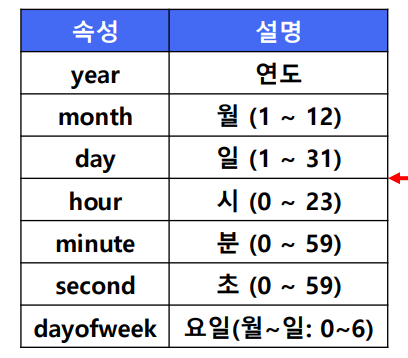

In [ ]:
df['연'] = df['날짜'].dt.year

In [ ]:
df['요일'] = df['날짜'].dt.dayofweek
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

새로운 컬럼 생성?
- 딕셔너리의 원리와 동일한 구조
    - 딕셔너리에 key가 존재하면 값 수정
    - 딕셔너리에 key가 없으면 새로운 컬럼 생성

### 데이터 값 매핑하여 시리즈 변환하기 : map()

데이터프레임의 특정 컬럼 전체의 값을 변환하는데 사용
- ```df['특정컬럼'].map(매핑기준)```
    - Serires 데이터에 대해서만 적용 가능
    - 각 원소 단위로 변환 수행
    - 특정 컬럼 전체를 변환하는데, 어떤 식으로 변환할지에 대한 방식을 지정하여 각각 원소에 적용

In [ ]:
print(df['요일'])

0       4
1       5
2       6
3       0
4       1
       ..
1081    2
1082    3
1083    4
1084    5
1085    6
Name: 요일, Length: 1086, dtype: int32


In [ ]:
# 숫자로 되어있던 '요일' 컬럼을 딕셔너리 기준에 맞춰 글자 '요일'로 변환
week = {0:'월', 1:'화', 2:'수',3:'목',4:'금',5:'토',6:'일'}

df['요일'] = df['요일'].map(week)

In [ ]:
print(df['요일'])

0       금
1       토
2       일
3       월
4       화
       ..
1081    수
1082    목
1083    금
1084    토
1085    일
Name: 요일, Length: 1086, dtype: object


### 데이터 값 함수 적용하여 변환하기 : apply()

- 사용자 정의 로직을 데이터에 적용
    - ```df.apply(함수, axis = 0 또는 1)```
    - ```df['특정컬럼'].apply(함수, axis=0 또는 1)```
- Series나 DataFrame의 각 원소에 함수를 적용
- 각 원소 단위로 변환 수행
- axis 매개변수가 0이면 컬럼단위, 1이면 행단위로 함수를 적용

In [ ]:
print(df['날씨'])

0       구름 조금
1       구름 많음
2       구름 많음
3       구름 많음
4       구름 많음
        ...  
1081    구름 많음
1082    구름 많음
1083    구름 조금
1084       흐림
1085    구름 조금
Name: 날씨, Length: 1086, dtype: object


In [ ]:
def weather(e):
    if e =='눈' or e =='비':
        return '눈/비'
    else:
        return e
    
df['날씨'] = df['날씨'].apply(weather)

In [ ]:
print(df['날씨'])

0       구름 조금
1       구름 많음
2       구름 많음
3       구름 많음
4       구름 많음
        ...  
1081    구름 많음
1082    구름 많음
1083    구름 조금
1084       흐림
1085    구름 조금
Name: 날씨, Length: 1086, dtype: object


### 참고 : lambda 함수
- 직접 정의할 수 도 있지만, 일회성으로 간단하게 정의해보자! 익명 함수 lambda

```lambda <매개변수> : <표현식>```

In [ ]:
def times(x):
    return x * 2

times = lambda x: x*2

print(times(10))

20


In [ ]:
def add(x,y):
    return x+y

add = lambda x,y : x + y

print(add(10,20))

30


In [ ]:
# lambda와 apply 활용

df['날씨'] = df['날씨'].apply(lambda e : "눈/비" if e =='눈' or e=='비' else e)

## 통계 기반 데이터 요약하기

데이터분석의 첫걸음 : 데이터를 이해하는 것
- 방대한 데이터를 한 눈에 파악하는 것은 불가능
- 정보를 요약하여 데이터의 정보를 미리 파악해 추후 분석 방향 판단 가능
    - 평균, 중앙값, 최댓값, 최솟값 같은 대표 값
    - 범주형 데이터의 빈도 분포
    - 수치형 데이터의 분산, 표준편차
    - 결측치, 이상치의 존재 여부

In [ ]:
data = pd.read_csv('data/seoul_park.csv')
df = pd.DataFrame(data)
print(df)

              날짜 공휴일     날씨   유료합계     어른  청소년  어린이  외국인   단체   무료합계     총계
0     2016-01-01   O  구름 조금  3,359  2,799  141  419   47    0  1,023  4,382
1     2016-01-02   O  구름 많음  5,173  4,370  203  600  100  111  2,092  7,265
2     2016-01-03   O  구름 많음  3,008  2,571  128  309   91    0  1,549  4,557
3     2016-01-04   X  구름 많음    890    602  NaN  235   51  223    800  1,690
4     2016-01-05   X  구름 많음    416    319   35   62   43   47    840  1,256
...          ...  ..    ...    ...    ...  ...  ...  ...  ...    ...    ...
1081  2019-03-27   X  구름 많음    504    464   10   30   21    -    613  1,117
1082  2019-03-28   X  구름 많음    761    687   46   28   35  108    904  1,665
1083  2019-03-29   X  구름 조금  1,644  1,447  120   77   14  188  1,226  2,870
1084  2019-03-30   O     흐림  1,539  1,326   44  169   29  115    913  2,452
1085  2019-03-31   O  구름 조금  3,061  2,563  111  387   53    -  1,357  4,418

[1086 rows x 11 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1086 non-null   object
 1   공휴일     1086 non-null   object
 2   날씨      946 non-null    object
 3   유료합계    1086 non-null   object
 4   어른      1086 non-null   object
 5   청소년     1081 non-null   object
 6   어린이     1086 non-null   object
 7   외국인     1086 non-null   object
 8   단체      1086 non-null   object
 9   무료합계    1086 non-null   object
 10  총계      1086 non-null   object
dtypes: object(11)
memory usage: 93.5+ KB


In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'])
df['유료합계'] = pd.to_numeric(df['유료합계'].str.replace(',','', regex=False))
df['어른'] = pd.to_numeric(df['어른'].str.replace(',','', regex=False))
df['청소년'] = df['청소년'].str.replace('-', '', regex=False)
df['청소년'] = pd.to_numeric(df['청소년'].str.replace(',','', regex=False))
df['어린이'] = pd.to_numeric(df['어린이'].str.replace(',','', regex=False))
df['외국인'] = df['외국인'].str.replace('-','', regex=False)
df['외국인'] = pd.to_numeric(df['외국인'].str.replace(',','', regex=False))
df['단체'] = pd.to_numeric(df['단체'].str.replace(',','', regex=False))
df['무료합계'] = pd.to_numeric(df['무료합계'].str.replace(',','', regex=False))
df['총계'] = pd.to_numeric(df['총계'].str.replace(',','', regex=False))


TypeError: repl must be a string or callable

### 데이터의 통계량 확인 메서드

In [ ]:
data = [
    ['A',100,85],
    ['B',96,88],
    ['C',94,91],
    ['A',92,94],
    ['B',90,97],
    ['C',89,100]
]
df2 = pd.DataFrame(data, columns = ['class', 'Korean', 'Math'])

In [ ]:
'''
데이터 통계량 확인 메서드 (1) 대표값(Central Tendency)
평균, 중앙값, 최빈값
'''
# 데이터 프레임 전체를 대상
df2.mean()    # 평균
df2.median()  # 중앙값
df2.mode()     # 최빈값2

# 특정 컬럼을 대상
df2['Korean'].mean()
df2['Korean'].median()
df2['Korean'].mode()

In [ ]:
'''
데이터 통계량 확인 메서드 (2) 산포도(Dispersion)
표준편차, 최대/최소, 분위수
'''
# 데이터 프레임 전체를 대상
df2.std()          # 표준편차
df2.max()          # 최대/최소
df2.quantile()     # 분위수

# 특정 컬럼을 대상
df2['Korean'].std()
df2['Korean'].max()
df2['Korean'].quantile()

In [ ]:
'''
데이터 통계량 확인 메서드 (3) 합계
합계, 누적합
'''
# 데이터 프레임 전체를 대상
df2.sum()          # 합계
df2.cumsum()          # 누적합


# 특정 컬럼을 대상
df2['Korean'].sum()
df2['Korean'].cumsum()

### 데이터의 전체 통계 : describe()

데이터프레임의 간단한 통계정보를 요약하여 표 형태로 확인
- ```df.describe()```
    - 수치형 컬럼: 평균, 표준편차, 최소, 최대, 분위수
- ```df.describe(include = 'object')
    - 범주형 컬럼: 개수, 고유값 개수, 최빈값, 최빈값 횟수

In [ ]:
data = pd.read_csv('data/seoul_park.csv')
df = pd.DataFrame(data)
print(df)

In [ ]:
df.describe()

,날짜,공휴일,날씨,유료합계,어른,청소년,어린이,외국인,단체,무료합계,총계
count,1086,1086,946,1086,1086,1081,1086,1086,1086,1086,1086
unique,1086,2,7,996,941,474,603,247,522,906,1012
top,2019-03-31,X,구름 많음,213,202,11,10,13,0,837,"1,349"
freq,1,731,277,5,4,17,11,22,351,5,3


In [ ]:
df.describe(include='object')

,날짜,공휴일,날씨,유료합계,어른,청소년,어린이,외국인,단체,무료합계,총계
count,1086,1086,946,1086,1086,1081,1086,1086,1086,1086,1086
unique,1086,2,7,996,941,474,603,247,522,906,1012
top,2019-03-31,X,구름 많음,213,202,11,10,13,0,837,"1,349"
freq,1,731,277,5,4,17,11,22,351,5,3


## 데이터 그룹화하여 요약하기

### 데이터 그룹화 : Groupby() - 한개의 컬럼으로

데이터를 그룹으로 묶어 분석할 때 사용. 특정 컬럼의 각 고유값끼리 행(row)을 그룹화
- ```df.groupby("그룹화 기준 컬럼")["집계 기준 컬럼"].집계함수```
    - 해당 컬럼의 값끼리 행 그룹화를 진행 후 , 집계 기준 컬럼에 대해 특정 집계함수로 요약

In [ ]:
data = [
    ['A',100,85],
    ['B',96,88],
    ['C',94,91],
    ['A',92,94],
    ['B',90,97],
    ['C',89,100]
]
df2 = pd.DataFrame(data, columns = ['class', 'Korean', 'Math'])

In [ ]:
# 반별로 국어 성적 합계 구하기
df2.groupby("class")['Korean'].mean()

TypeError: agg function failed [how->mean,dtype->object]

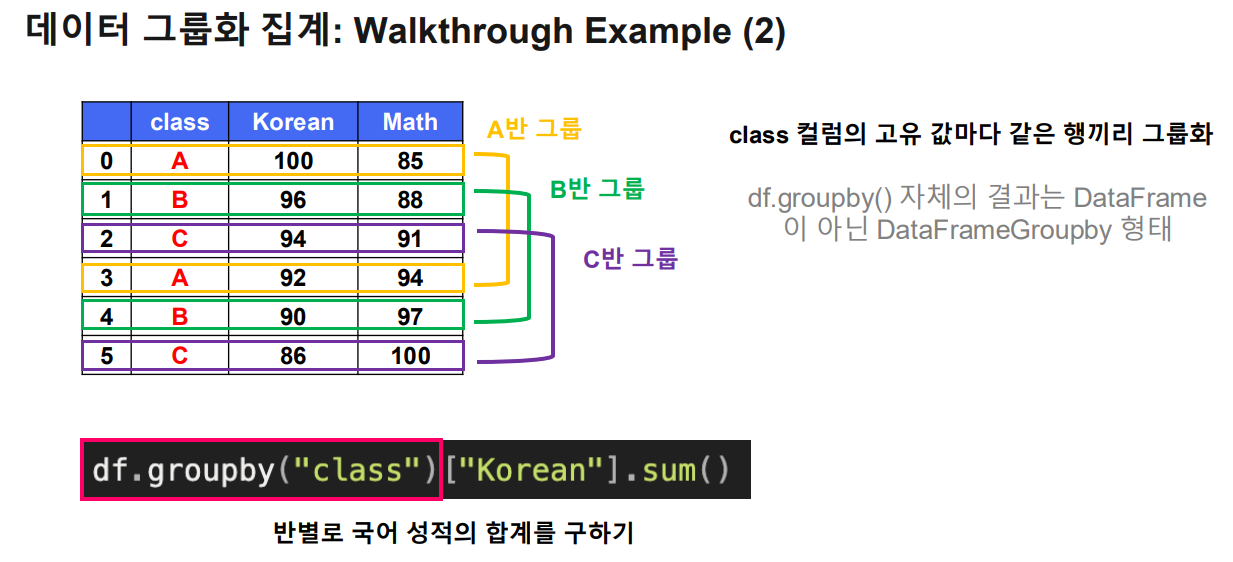

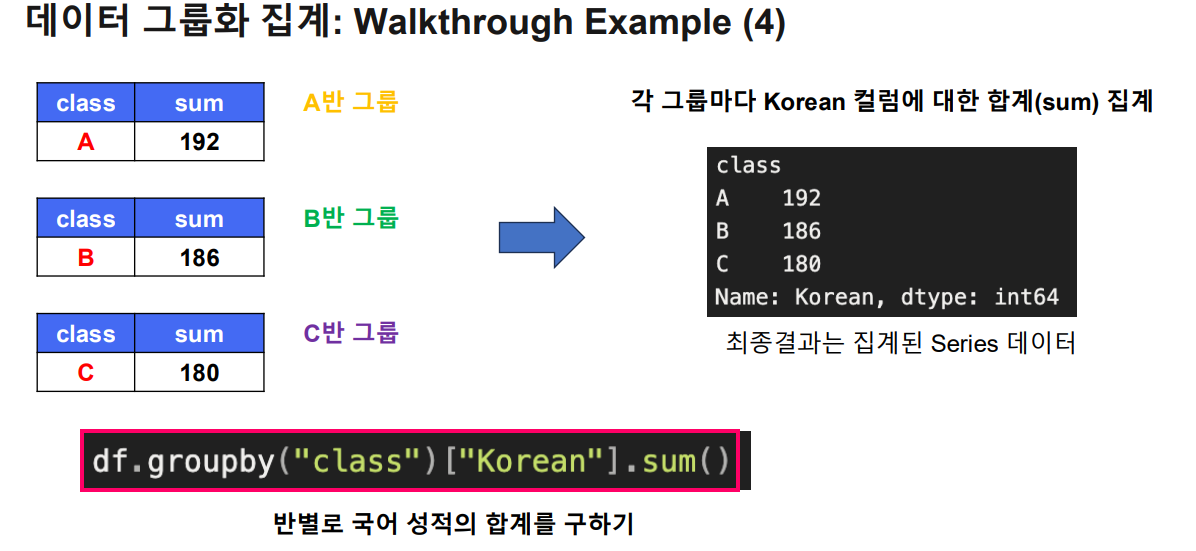

### 데이터 그룹화:groupby() - 두개 이상의 컬럼

그룹화할 때, 두 개 이상의 컬럼을 기준으로 집계 가능
- ```df.groupby(['컬럽1','컬럼2'])['집계기준컬럼'].집계함수```
    - 두 개 이상을 그룹화한다는 것은 더 세부적으로 그룹화하겠다라는 의미
    - 각 컬럽의 고유 값 조합 쌍에 대해서 집계하는 것

### 데이터 그룹화:groupby() - 전체 컬럼

- 특정 컬럼을 지정하지 않고, 전체 컬럼에 대해서 집계 가능
    - ```df.groupby('컬럼').집계함수```